# **Laboratorio 10:** Redes Neuronales para Visión Artificial
**Programa:** [Bootcamp en Visión Artificial para los ODS](https://github.com/EdwinTSalcedo/Bootcamp-Computer-Vision-for-the-SDGs) - **Autor:** [Edwin Salcedo](https://github.com/EdwinTSalcedo)

TensorFlow es una librería open source completa de aprendizaje automático para preprocesar datos, modelar y desplegar modelos. TensorFlow (TF) permite que en lugar de crear modelos de aprendizaje automático y aprendizaje profundo desde cero, hagamos uso de esta librería para acelerar el desarrollo de estos modelos. Esto se debe a que contiene muchas de las funciones más comunes de aprendizaje automático. Por ejemplo, funciones de perdida, optimizadores, logging, etc, ya se encuentran implementadas y listas para usarse.

Desde este laboratorio, nos centraremos en implementar nuestras primeras Red Neuronales con TensorFlow. 

Registra los datos de tu equipo en esta sección al finalizar el laboratorio. 

**Nombre de equipo:**

**Miembros de equipo:**
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%) 



## 1. Introducción a las redes neuronales

El aprendizaje profundo o Deep Learning se basa principalmente en redes neuronales artificiales, las cuales existen de alguna forma desde finales de la década de 1950. Las redes se construyen a partir de nodos individuales que se aproximan a las neuronas, típicamente llamados unidades o simplemente "neuronas". Cada unidad tiene cierto número de entradas ponderadas por la variables $w_i$, las cuales deben sumar 1 si se encuentran en la misma columna de conexiones. Estas entradas ponderadas se suman mediante una combinación lineal y luego se pasan a través de una función de activación para obtener la salida del nodo.

<center>
<img src='https://drive.google.com/uc?id=1ccsF880TA9nN6-n8IDE7DOZDjQLiYOzD' width='60%'>
</center>

Matemáticamente, una neurona se define de la siguiente manera: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i \right)
\end{align}
$$


Por otra parte, la sumatoria calculada antes de usar una función de activación $f$ se puede representar con el producto punto/interior de dos vectores, tomando en cuenta de que $x_i$ y $w_i$ serán dos vectores:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

Es hora de implementar esta red básica con TF. 

In [ ]:
# Importar librerías 
import tensorflow as tf
import numpy as np

# La librería logging es un medio para rastrear eventos que ocurren cuando se ejecuta un script. 
# El componente tf.logger() de TF tiene programado enviar logs a este logger cuando exista algún error
# en la ejecución. 
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
# Mostrar la versión de librería que estamos usando y si contamos con GPU 
# Esto es útil para comprobar compatibilidades al debuggear código
print('Versión de TensorFlow:', tf.__version__)
print('Versión de Keras:', tf.keras.__version__)
print('Probar GPU' if tf.test.is_gpu_available() else 'No se encontró GPU. Corriendo en CPU')

Versión de TensorFlow: 2.8.2
Versión de Keras: 2.8.0
Probar GPU


In [ ]:
# Establecer la semilla aleatoria para que los números generados sean reproducibles
tf.random.set_seed(7) 

# Crear 3 características aleatorias
features = tf.random.normal((1, 3))

# Crear 3 pesos aleatorios para nuestra red neuronal
weights = tf.random.normal((1, 3))

# Crear un bias aleatorio 
bias = tf.random.normal((1, 1))

print('Features:\n', features)
print('\nWeights:\n', weights)
print('\nBias:\n', bias)

Features:
 tf.Tensor([[0.5983449  0.06276207 0.14631742]], shape=(1, 3), dtype=float32)

Weights:
 tf.Tensor([[-2.2733312 -1.6592104 -0.2633568]], shape=(1, 3), dtype=float32)

Bias:
 tf.Tensor([[1.5749502]], shape=(1, 1), dtype=float32)


Ahora creemos la función de activación que vamos a utilizar. Para estas primeras redes neuronales, usaremos una función de activación sigmoidal definida de la siguiente manera: 


$$
\begin{align}
f(x) &= \frac{1}{1+e^{-x}}
\end{align}
$$

In [ ]:
def sigmoid_activation(x):
    """ Función de activación sigmoidal 
    
        Argumentos
        ---------
        x: tf.Tensor. Tendra que ser uno de los siguientes tipos: bfloat16, half, float32, float64, complex64, complex128.
    """
    return 1/(1+tf.exp(-x))

Ahora, calculemos el resultado de procesar los datos de entrada ( *features*), multiplicados por los pesos (*weights*), con la función de activación. Antes, este resultado debera ser sumado con el *Bias* respectivo.  

In [ ]:
y = sigmoid_activation(tf.reduce_sum(tf.multiply(features, weights)) + bias)

print('label:\n', y)

label:
 tf.Tensor([[0.51800346]], shape=(1, 1), dtype=float32)


El resultado de esta *propagación hacia adelante* (*forward propagation*) es 0.52. Podrías considerar que este resultado es nuestro "Hola Mundo" en TF para las Redes Neuronales. 

## 2. Red neuronal multicapa

La anterior red neuronal, conocida también como Regresión Logística, toma en cuenta un solo nodo interno y es una de las mas simples. Sin embargo, podemos ensamblar mas nodos de entrada, nodos internos y nodos de salida. En este tipo de redes neuronales, la salida de una capa se convertirá en la entrada de la siguiente capa. Con múltiples unidades de entrada y de salida, expresar los pesos como una matriz nos facilitara ejecutar calculos entre estas unidades.

<center>
<img src='https://drive.google.com/uc?id=1fwi_D2sjIH-q04ssy8-DR9RjbnWTQkBD' width='60%'>
</center> 


Nuevamente, podemos expresar matemáticamente esta arquitectura con matrices y usar la multiplicación de matrices para obtener combinaciones lineales para cada unidad en una sola operación. Por ejemplo, la capa oculta (compuesta por $h_1$ y $h_2$ en el gráfico) puede calcularse de la siguiente manera: 

$$
\vec{h} = [h_1 \, h_2] = 
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$


Entonces, el resultado en $h_1$ y $h_2$ puede ser pasado como entrada para las funciones de activación respectivas, por lo que la salida de la red neuronal quedara simplemente como:  

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$

Es hora de implementar esta red neuronal en TF. 

In [ ]:
# Establecer la semilla aleatoria para que los números generados sean reproducibles
tf.random.set_seed(7) 

# Crear 3 datos de entrada (características aleatorias)
features = tf.random.normal((1,3))

# Definir el tamaño de cada capa en nuestra red
n_input = features.shape[1]     # Número de unidades de entrada, debe coincidir con el número de unidades de entrada
n_hidden = 2                    # Número de unidades ocultas
n_output = 1                    # Número de unidades de salida

# Crear los pesos aleatorios para las conexiones que van desde las entradas hacia la capa oculta
W1 = tf.random.normal((n_input,n_hidden))

# Crear pesos aleatorios para las conexiones que van desde la capa oculta hacia la capa de salida
W2 = tf.random.normal((n_hidden, n_output))

# Crear bias aleatorios para la capa oculta y la de salida
B1 = tf.random.normal((1,n_hidden))
B2 = tf.random.normal((1, n_output))

# Aplicar la función de activación sigmoidal 
h = sigmoid_activation(tf.matmul(features, W1) + B1)
output = sigmoid_activation(tf.matmul(h, W2) + B2)

# Mostrar el resultado
print(output)

tf.Tensor([[0.10678572]], shape=(1, 1), dtype=float32)


Nuevamente, logramos implementar *forward propagation* con nuestra red y nuestros datos generados aleatoriamente. Mientras más capas y unidades ocultas tenga una red, mejor podrá aprender de los datos y hacer predicciones precisas. Por otro lado, tener muchas capas y tener pocos datos también aumentara el riesgo de sobreajuste de la red, lo que significa que el modelo no podra hacer buenas predicciones con nuevos datos. 


## 3. Redes Neuronales con TensorFlow y Keras 

Las redes neuronales que veremos desde este punto tendrán mas capas y unidades que antes. Además que los datasets que usaremos serán mas grandes. En la actualidad, las redes neuronales pueden llegar a tener docenas o incluso cientos de capas, de ahi el denominativo de profundas (Deep). Aunque estas redes profundas se pueden desarrollar  usando la estrategía propuesta arriba, utilizando solo tensores y operaciones básicas entre tensores, por lo general este método es muy engorroso y difícil de implementar. TensorFlow tiene una API llamada Keras que facilita mucho la manera de construir grandes redes neuronales de manera eficiente. Desde este punto nos enfocaremos en usar esta API. 

Implementaremos y entrenaremos una red neuronal para reconocer prendas de vestir, desde un conjunto de datos muy conocido denominado Fashion MNIST. Puedes obtener más información sobre este dataset [aquí](https://github.com/zalandoresearch/fashion-mnist). Este dataset contiene 70,000 prendas de vestir divididos en 10 categorías diferentes. Cada prenda se encuentra en una imagen en escala de grises de 28x28 pixeles. Puedes ver algunos samples aquí: 

<center>
<img src='https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png' width='50%'>
</center>

Las etiquetas asociadas con el conjunto de datos son:

<table>
<tr>
  <td colspan="1" rowspan="1"><p><strong>Label</strong></p>
  </td>
  <td colspan="1" rowspan="1"><p>0</p>
  </td>
  <td colspan="1" rowspan="1"><p>1</p>
  </td>
  <td colspan="1" rowspan="1"><p>2</p>
  </td>
  <td colspan="1" rowspan="1"><p>3</p>
  </td>
  <td colspan="1" rowspan="1"><p>4</p>
  </td>
  <td colspan="1" rowspan="1"><p>5</p>
  </td>
  <td colspan="1" rowspan="1"><p>6</p>
  </td>
  <td colspan="1" rowspan="1"><p>7</p>
  </td>
  <td colspan="1" rowspan="1"><p>8</p>
  </td>
  <td colspan="1" rowspan="1"><p>9</p>
  </td>
</tr>
<tr><td colspan="1" rowspan="1"><p><strong>Description</strong></p>
  </td>
  <td colspan="1" rowspan="1"><p>T-shirt/top</p>
  </td>
  <td colspan="1" rowspan="1"><p>Trouser</p>
  </td>
  <td colspan="1" rowspan="1"><p>Pullover</p>
  </td>
  <td colspan="1" rowspan="1"><p>Dress</p>
  </td>
  <td colspan="1" rowspan="1"><p>Coat</p>
  </td>
  <td colspan="1" rowspan="1"><p>Sandal</p>
  </td>
  <td colspan="1" rowspan="1"><p>Shirt</p>
  </td>
  <td colspan="1" rowspan="1"><p>Sneaker</p>
  </td>
  <td colspan="1" rowspan="1"><p>Bag</p>
  </td>
  <td colspan="1" rowspan="1"><p>Ankle boot</p>
  </td>
</tr>
</table>

Nuestro objetivo es construir una red neuronal que pueda tomar una de estas imágenes y pueda predecir la prenda de ropa en la imagen. Para esto, primero necesitamos obtener el dataset que vamos a usar para entrenar y probar nuestra red neuronal. Obtendremos nuestro dataset usando el paquete `tensorflow_datasets`. TensorFlow Datasets es un repositorio de datasets listos para usar con TensorFlow. TensorFlow Datasets tiene una amplia variedad de conjuntos de datos para entrenar sus modelos de aprendizaje automático para muchas tareas diferentes, desde texto hasta vídeo. Para obtener una lista completa de los conjuntos de datos disponibles en TensorFlow Datasets, puedes consultar este [catálogo](https://www.tensorflow.org/datasets/catalog/overview#all_datasets).

In [ ]:
import tensorflow_datasets as tfds

# Cargar datos de entrenamiento de Fashion-MNIST. La función recibe los siguientes
# parametros: 
# split: indica que subconjunto deseamos importar
# as_supervised: define si los datos importados tendran la estructura input, label por instancia. Si este parametro es false
# el dataset importado sera para una tarea no supervisada (solo datos sin etiquetas)
# with_info: define si queremos obtener información adicional del subconjunto
training_set, dataset_info_train = tfds.load('fashion_mnist', split = 'train', as_supervised = True, with_info = True)
testing_set, dataset_info_test = tfds.load('fashion_mnist', split = 'test', as_supervised = True, with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteOKB7KJ/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteOKB7KJ/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


### 3.1 Explorar datos

Hasta este punto, hemos cargado los datos en las variables `training_set` y `test_set`. Por otra parte, la variable `dataset_info_train` y `dataset_info_test` contienen la información de los subconjuntos, como por ejemplo: el número total de categorías o el número total de imágenes. Veamos esta información para el subconjunto de entrenamiento. 

In [ ]:
num_classes = dataset_info_train.features['label'].num_classes
print('Existen',num_classes,'categorías en el dataset')

num_training_examples = dataset_info_train.splits['train'].num_examples
print('Existen',num_training_examples, 'imágenes en el conjunto de entrenamiento')

Existen 10 categorías en el dataset
Existen 60000 imágenes en el conjunto de entrenamiento


Como podemos ver, el subconjunto de entrenamiento contiene 60K imágenes, por lo que el subconjunto de evaluación debería tener los restantes 10K. Ahora mostraremos una instancia de este subconjunto y sus propiedades. La función `.take(1)` permite elegir un elemento de nuestro subconjunto de datos. Dado que nuestro subconjunto `training_set` consta de imágenes y etiquetas, el método `.take(1)` recuperara solo la primera imagen con su respectiva etiqueta.


Las imágenes en el sub conjunto de entrenamiento tienen:
dtype: <dtype: 'uint8'>
shape: (28, 28)
max value tf.Tensor(255, shape=(), dtype=uint8)
max value tf.Tensor(0, shape=(), dtype=uint8)

Las etiquetas en el sub conjunto de entrenamiento tienen:
dtype: <dtype: 'int64'>
shape: ()
Etiqueta: tf.Tensor(2, shape=(), dtype=int64)


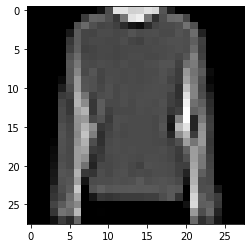

In [ ]:
import matplotlib.pyplot as plt

for image, label in training_set.take(1):
  # Remover las dimensiones con solo una unidad, la ultima en este caso -> (28, 28, 1)
  image = tf.squeeze(image)

  print('Las imágenes en el sub conjunto de entrenamiento tienen:')
  print('dtype:', image.dtype) 
  print('shape:', image.shape)
  print('max value',tf.reduce_max(image)) # Encuentra el valor máximo en un tensor
  print('max value',tf.reduce_min(image))  # Encuentra el valor mínimo en un tensor

  print('\nLas etiquetas en el sub conjunto de entrenamiento tienen:')
  print('dtype:', label.dtype) 
  print('shape:', label.shape)
  print('Etiqueta:',label)
  
  plt.imshow(image, cmap ='gray')

### 3.2 Preprocesamiento de datos

Como podemos ver, la primera imagen tiene valores en el rango [0, 255]. Normalizar estos valores hacia el rango [0, 1] es una buena practica debido a que tener imágenes con valores enteros altos puede generar problemas al encontrar y propagar las gradientes con respecto a los parametros de un modelo. También, es conocido que los datos normalizados permiten optimizar mejor el entrenamiento de un modelo. En consecuencia, crearemos una función corta para normalizar las imágenes y otra para transformarlas cada vez que se requiere cargar imágenes en lotes. 

In [ ]:
def normalize(image, label):
    # Convertir la imagen a float32 para usar valores decimales en el tensor
    image = tf.cast(image, tf.float32)
    # Dividir el tensor entre el nivel de intensidad mas alto en la imagen
    image /= 255

    return image, label

def prepare_subset(subset, batch_size): 
  # Almacenar el subconjunto de datos de entrenamiento en cache
  batches = training_set.cache()
  # Barajar (intercambiar el orden) el subconjunto. Esta mezcla aleatoria se 
  # hara antes de procesar el dataset con el modelo. Podemos definir el comportamiento 
  # de esta función (cuan barajados estaran los lotes) definiendo un valor igual o 
  # menor al tamaño del subconjunto. Para realizar un barajamiento completo con 
  # respecto a todo el subconjunto, solo basta pasar como parametro el tamaño completo 
  # del subconjunto. En este caso tomaremos en cuenta a la cuarta parte. 
  batches = batches.shuffle(num_training_examples//4)
  # Dividir al subconjunto en lotes y aplicarles la función normalize()
  # prefetch(1) convierte a esta tarea en asincrona, por lo que seguira su ejecución
  # sin paralizar toda la tarea de cargado de datos. De esta manera, las tareas de 
  # procesamiento de datos se llevaran a cabo en paralelo
  batches = batches.batch(batch_size).map(normalize).prefetch(1)

  return batches

# Primer hiperparametro. Tamaño de lote. 
BATCH_SIZE = 64

training_batches = prepare_subset(training_set, BATCH_SIZE)
testing_batches = prepare_subset(testing_set, BATCH_SIZE)

# Mostrar el contenido de un batch
for image_batch, label_batch in training_batches.take(1):
    print('dtype:', image_batch.dtype) 
    print('shape:', image_batch.shape)
    image_batch

    print('Etiquetas:', label_batch)

dtype: <dtype: 'float32'>
shape: (64, 28, 28, 1)
Etiquetas: tf.Tensor(
[3 1 7 1 3 8 2 6 6 7 0 9 2 4 6 2 6 3 1 6 5 8 5 6 9 5 3 9 2 7 0 1 6 5 2 3 7
 5 0 3 4 5 6 1 2 5 8 3 8 3 1 1 9 6 6 4 8 1 9 0 1 5 7 7], shape=(64,), dtype=int64)


Por ahora, se puede entender que el preprocesamiento de un dataset conlleva el uso de varias funciones (también conocidas como transformaciones) que tienen el objetivo de poner a las imágenes y etiquetas en el mejor estado posible. Para ver mas estrategías de preprocesamiento o para aplicar los metodos vistos en clase, se sugiere ver los tutoriales [Mejor rendimiento con la API tf.data](https://www.tensorflow.org/guide/data_performance) y [Transformaciones](https://www.tensorflow.org/api_docs/python/tf/data/Dataset). En los siguientes tutoriales veras métodos mas complejos de carga de datos. 

### 3.3 Construir la redes neuronales con Keras

Desde esta sección, usaremos diferentes funciones/capas del API Keras de TensorFlow para construir la red neuronal. Es importante resaltar  que se espera que la red reciba una imagen con una prenda de vestir como entrada y prediga a que categoría pertenece la prenda en la imagen. La arquitectura que desarrollaremos es la siguiente: 

<center>
<img src='https://drive.google.com/uc?id=1esmHvTY9au01DuNUsfn_2EsYg2pzdjIP' width='70%'>
</center>


Keras es una API de alto nivel que corre encima de TensorFlow como una interfaz de desarrollo de alto nivel y que tiene como objetivo acelearar la experimentación con modelos. Keras es accesible desde TensorFlow como un submodulo: `tf.keras`. En Keras, los modelos de aprendizaje profundo se construyen conectando bloques configurables llamados capas. El tipo de modelo más común es una pila de capas, también conocida como modelo secuencial o *Sequential Model*. El modelo se llama secuencial porque permite pasar un tensor secuencialmente a través de una serie de capas y generan un resultado. En TF, el modelo secuencial se implementa con `tf.keras.Sequential`.

En la siguiente celda, podrás notar que nuestro modelo secuencial tiene estos tres tipos de capas: 

- **Capa de entrada `tf.keras.layers.Flatten`**: Esta capa aplana las imágenes transformando sus dimensiones de 28x28 píxeles a un vector de 784 píxeles (28*28 = 784). 

- **Capas ocultas `tf.keras.layers.Dense`:** En este modelo existen dos capas ocultas que tendran la tarea de extraer los patrones desde las imágenes para que luego el modelo pueda reconocer prendas en nuevas imágenes. Estas capas se implementan con capas densamente  conectadas (también conocida como Fully Connected). Para esta capa necesitamos especificar el número de neuronas (o nodos) que queremos usar y la función de activación. 

- **Capa oculta `tf.keras.layers.Dense`:** Esta sera una capa densamente conectada con 10 neuronas y una función de activación softmax. Los valores de salida representarán la probabilidad de que la imagen sea de un dígito particular. Para la función softmax, es importante entender que la suma de todos los valores de los 10 nodos sera siempre 1.

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28,1)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

# Mostrar resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Inicializar los pesos y bias en el modelo
model.build((None, 28, 28, 1))

# Limpiar los datos que hubiesen sido guardados en entrenamientos anteriores
tf.keras.backend.clear_session()

### 3.4 Entrenamiento de redes neuronales con TensorFlow

Antes de que podamos entrenar nuestro modelo, necesitamos establecer otros hiperparámetros esenciales que vamos a usar para entrenarlo. Podemos configurar esto usando el método `.compile()`. Los principales parámetros que debemos especificar son:

- **Optimizer:** El algoritmo que usaremos para actualizar los pesos de nuestro modelo durante el entrenamiento. En esta ocasión usaremos el optimizador `ADAM`. 
- **Función de pérdida:** la función de pérdida que usaremos durante el entrenamiento para medir la diferencia entre las etiquetas verdaderas de las imágenes en su conjunto de datos y las predicciones hechas por su modelo. En esta lección usaremos la función de pérdida `sparce_categorical_crossentropy`. 
- **Métricas:** una lista de métricas que el modelo evaluará durante el entrenamiento. A lo largo de estas laboratorios, mediremos diferentes metricas para evaluar a nuestro modelo. Como se explico en clases, `accuracy` calcula con qué frecuencia las predicciones de nuestro modelo coinciden con las etiquetas verdaderas de las imágenes en nuestro dataset. Para obtener una lista completa de las métricas disponibles en `tf.keras`, puedes consultar la documentación de [métricas](https://keras.io/api/metrics/).

Compile permite confirmar mas parametros del proceso de entrenamiento. Puedes revisar estos con mas detalles en la documentación de [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Por ahora, podemos ver que obtiene nuestro modelo si le pasamos un conjunto de imágenes. 

In [ ]:
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

print('\nPerdida (Loss) antes del entrenamiento: {:,.3f}'.format(loss))
print('Precisión antes del entrenamiento: {:.3%}'.format(accuracy))

2/2 [==============================] - 0s 7ms/step - loss: 2.2681 - accuracy: 0.1094

Perdida (Loss) antes del entrenamiento: 2.268
Precisión antes del entrenamiento: 10.938%


Es hora de entrenar la red, en esta ocasión lo haremos con 5 epocas.

In [ ]:
EPOCHS = 5

history = model.fit(training_batches, epochs = EPOCHS)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.5155 - accuracy: 0.8191
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3745 - accuracy: 0.8638
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.3404 - accuracy: 0.8748
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.3140 - accuracy: 0.8839
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 0.2980 - accuracy: 0.8893


In [ ]:
# Mostrar las metricas recolectadas durante cada epoca
print(history.params)
print(print(history.history['loss']))
print(print(history.history['accuracy']))

{'verbose': 1, 'epochs': 5, 'steps': 938}
[0.515450656414032, 0.3745405077934265, 0.3404347598552704, 0.3139651119709015, 0.29796645045280457]
None
[0.8190666437149048, 0.8638333082199097, 0.8747666478157043, 0.8839166760444641, 0.8893333077430725]
None


### 3.5 Evaluar el modelo entrenado

Una vez entrenado, podemos comprobar cuan bien aprendio el modelo. Para esto, tomaremos la primera imagen de un lote para visualizar el resultado de predicción del modelo. La función del modelo que nos ayudara con esta tarea sera `.predict()`.

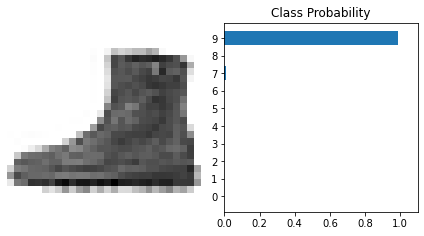

In [ ]:
for image_batch, label_batch in testing_batches.take(1):
  # Predecir resultados con un batch 
  ps = model.predict(image_batch)
  # Recuperar la primera imagen
  first_image = image_batch.numpy().squeeze()[0]
  
# Visualizar la imagen y las probabilidades resultantes de pasar la imagen por el modelo
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

¡No esta mal 🤔!  Si ejecutas la anterior celda veras que el modelo lo hace bien con imágenes de ciertas categorías, pero llega a fallar con otras. Evaluar un modelo de manera visual no es preciso, por lo que ahora usaremos la función `.evaluate()` para calcular las métricas que obtiene el modelo con un batch del conjunto de datos de evaluación. 

In [ ]:
for image_batch, label_batch in testing_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

print('\n Loss después del entrenamiento: {:,.3f}'.format(loss))
print('Accuracy después del entrenamiento: {:.3%}'.format(accuracy))

2/2 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.9531

 Loss después del entrenamiento: 0.171
Accuracy después del entrenamiento: 95.312%


## **Ejercicio 1:** Métricas de Evaluación

Este ultimo modelo obtuvo 95.3% de *accuracy*. Ahora, tendrás que investigar y visualizar las métricas de evaluación definidas en nuestra clase sobre **Optimización del Entrenamiento**: LogarithmicLoss, Matriz de Confusión, AUC, Recall, y F1 Score para un lote del subconjunto de evaluación. Puede usar `matplotlib` y `sklearn.metrics` para calcular y visualizar los resultados. 

## **Ejercicio 2:** Clasificación de Imágenes

Para este ejercicio deberas seleccionar un dataset de clasificación de imagenes relacionado a tu proyecto desde el [catálogo](https://www.tensorflow.org/datasets/catalog/overview#all_datasets) de datasets de TF. Luego, deberas crear una red neuronal para clasificar entre las diferentes categorias del dataset. Finalmente, deberas evaluar el modelo con un lote del subconjunto de evaluación. Por ahora, no sera importante obtener buenas métricas; sin embargo, puedes aplicar las técnicas vistas en clase y en este laboratorio para mejorarlas. 

## 4. Referencias
- [Consejos para Mejorar el Rendimiento de Modelos](https://www.tensorflow.org/datasets/performances) 